In [1]:
import nidaqmx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
task = nidaqmx.Task('galvoAO')

In [9]:
AOchannels = [0,1]
sampleRate = 100000
numSamplesPerChannel = 50
sampleClockSource = 'PFI0'
devName = 'Dev1'

The matlab command has thi scall string:
 ```
 function chanObjs = createAIVoltageChan(obj,deviceNames,chanIDs,chanNames,minVal,maxVal,units,customScaleName,terminalConfig)
    deviceNames: String or string cell array specifying names of device on which channel(s) should be added, e.g. 'Dev1'. If a cell array, chanIDs must also be a cell array (of equal length).
    chanIDs: A numeric array of channel IDs or, in the case of multiple deviceNames (a multi-device Task), a cell array of such numeric arrays
    chanNames: (OPTIONAL) A string or string cell array specifying names to assign to each of the channels in chanIDs (if a single string, the chanID is appended for each channel) In the case of a multi-device Task, a cell array of such strings or string cell arrays. If omitted/empty, then default DAQmx channel name is used.
    minVal: (OPTIONAL) The minimum value, in units, that you expect to generate. If omitted/blank, then largest possible range supported by device is used.
    maxVal: (OPTIONAL) The maximum value, in units, that you expect to generate. If omitted/blank, then largest possible range supported by device is used.
    units: (OPTIONAL) One of {'DAQmx_Val_Volts', 'DAQmx_Val_FromCustomScale'}. Specifies units in which to generate voltage. 'DAQmx_Val_FromCustomScale' specifies that units of a supplied scale are to be used (see 'units' argument). If blank/omitted, default is 'DAQmx_Val_Volts'.
    customScaleName: (OPTIONAL) The name of a custom scale to apply to the channel. To use this parameter, you must set units to 'DAQmx_Val_FromCustomScale'. If you do not set units to DAQmx_Val_FromCustomScale, this argument is ignored.
 
    chanObjs: The created Channel object(s)
```    

which koseki calls like this:
```
AOchannels = [0,1];
sampleRate = 10000;
numSamplesPerChannel = length(shutter);

devName = 'Dev1';
sampleClockSource = 'PFI0';

% Analog output for galvano mirror
global hTaskAO

hTaskAO = dabs.ni.daqmx.Task('galvoAO');
hTaskAO.createAOVoltageChan(devName, AOchannels, [], -10, 10);
```

In [4]:
channels = ['Dev1/ao0', 'Dev1/ao1']

task.ao_channels.add_ao_voltage_chan(channels[0],'x', min_val=-10, max_val=10)
task.ao_channels.add_ao_voltage_chan(channels[1],'y', min_val=-10, max_val=10)

AOChannel(name=y)

In [8]:
task.close()

c:\users\raman\miniconda3\envs\control\lib\site-packages\nidaqmx\task.py:463: ResourceWarning: Attempted to close NI-DAQmx task of name "galvoAO" but task was already closed.
  'already closed.'.format(self._saved_name), DaqResourceWarning)


In [9]:
sampleRate = 10000
numSamplePerChannel = 50 # len(shutter)
sampleClockSource = 'PFI0'
task.timing.cfg_samp_clk_timing(sampleRate,
                                source = sampleClockSource,
                                active_edge = nidaqmx.constants.Edge.FALLING,
                                sample_mode= nidaqmx.constants.AcquisitionType.FINITE,
                                samps_per_chan=numSamplePerChannel)

DaqError: Task specified is invalid or does not exist.
Status Code: -200088

In [12]:
chan = task.ao_channels['x']

In [99]:
task.write([0,.3])

1

In [10]:
shut = [True, False]*5
shutter_task = nidaqmx.Task()
shutter_chan = shutter_task.do_channels.add_do_chan('Dev1/port0/line0')
shutter_task.timing.cfg_samp_clk_timing(sampleRate,
                                        source= sampleClockSource,
                                        active_edge=nidaqmx.constants.Edge.FALLING,
                                        sample_mode= nidaqmx.constants.AcquisitionType.FINITE,
                                        samps_per_chan=len(shut)
                                       )


In [11]:
shutter_task.write(shut,auto_start=False)

10

In [7]:
shutter_task.stop()

In [92]:
nidaqmx.system.System.

'EXTERNAL'

In [86]:
[True, False]*5

[True, False, True, False, True, False, True, False, True, False]

In [13]:
list(shutter_task.do_channels)

[DOChannel(name=Dev1/port0/line0)]

In [19]:
task.close()

In [20]:
shutter_task.close()

In [14]:
system = nidaqmx.system.System.local()

In [15]:
system.driver_version

DriverVersion(major_version=19, minor_version=1, update_version=0)

In [16]:
for device in system.devices:
    print(device)

Device(name=Dev1)
Device(name=SimDev1)


In [17]:
device = system.devices['Dev1']

In [18]:
device.ao_physical_chans.channel_names

['Dev1/ao0', 'Dev1/ao1', 'Dev1/ao2', 'Dev1/ao3']

In [21]:
device.do_ports.channel_names

['Dev1/port0', 'Dev1/port1', 'Dev1/port2']

In [22]:
device.do_lines.channel_names


['Dev1/port0/line0',
 'Dev1/port0/line1',
 'Dev1/port0/line2',
 'Dev1/port0/line3',
 'Dev1/port0/line4',
 'Dev1/port0/line5',
 'Dev1/port0/line6',
 'Dev1/port0/line7',
 'Dev1/port0/line8',
 'Dev1/port0/line9',
 'Dev1/port0/line10',
 'Dev1/port0/line11',
 'Dev1/port0/line12',
 'Dev1/port0/line13',
 'Dev1/port0/line14',
 'Dev1/port0/line15',
 'Dev1/port0/line16',
 'Dev1/port0/line17',
 'Dev1/port0/line18',
 'Dev1/port0/line19',
 'Dev1/port0/line20',
 'Dev1/port0/line21',
 'Dev1/port0/line22',
 'Dev1/port0/line23',
 'Dev1/port0/line24',
 'Dev1/port0/line25',
 'Dev1/port0/line26',
 'Dev1/port0/line27',
 'Dev1/port0/line28',
 'Dev1/port0/line29',
 'Dev1/port0/line30',
 'Dev1/port0/line31',
 'Dev1/port1/line0',
 'Dev1/port1/line1',
 'Dev1/port1/line2',
 'Dev1/port1/line3',
 'Dev1/port1/line4',
 'Dev1/port1/line5',
 'Dev1/port1/line6',
 'Dev1/port1/line7',
 'Dev1/port2/line0',
 'Dev1/port2/line1',
 'Dev1/port2/line2',
 'Dev1/port2/line3',
 'Dev1/port2/line4',
 'Dev1/port2/line5',
 'Dev1/port2

## Camera Stuff (lightfield)

In [14]:
# Import the .NET class library
import clr, ctypes

# Import python sys module
import sys, os

# numpy import
import numpy as np

# Import c compatible List and String
from System import *
from System.Collections.Generic import List
from System.Runtime.InteropServices import Marshal
from System.Runtime.InteropServices import GCHandle, GCHandleType


# Add needed dll references
sys.path.append(os.environ['LIGHTFIELD_ROOT'])
sys.path.append(os.environ['LIGHTFIELD_ROOT']+"\\AddInViews")
clr.AddReference('PrincetonInstruments.LightFieldViewV5')
clr.AddReference('PrincetonInstruments.LightField.AutomationV5')
clr.AddReference('PrincetonInstruments.LightFieldAddInSupportServices')

# PI imports
from PrincetonInstruments.LightField.Automation import *
from PrincetonInstruments.LightField.AddIns import *


c:\users\raman\miniconda3\envs\control\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The module was found, but not in a referenced namespace.
Implicit loading is deprecated. Please use clr.AddReference('System.Collections').
  if sys.path[0] == '':


In [15]:
# Create the LightField Application (true for visible)
# The 2nd parameter forces LF to load with no experiment 
auto = Automation(True, List[String]())


In [16]:
experiment = auto.LightFieldApplication.Experiment

In [17]:
experiment.Load('Pixis')

True

In [14]:
experiment.Se

In [18]:
def set_value(setting, value):    
    # Check for existence before setting
    # gain, adc rate, or adc quality
    if experiment.Exists(setting):
        experiment.SetValue(setting, value)

def device_found():
    # Find connected device
    for device in experiment.ExperimentDevices:
        if (device.Type == DeviceType.Camera):
            return True
     
    # If connected device is not a camera inform the user
    print("Camera not found. Please add a camera and try again.")
    return False  

In [19]:
device_found()

True

In [20]:
for device in experiment.ExperimentDevices:
    print(device)
    print(device.Type)

PrincetonInstruments.LightField.AddIns.HostSideAdapters.IDeviceContractToViewHostAdapter
1


In [21]:
set_value(CameraSettings.ShutterTimingExposureTime, 500.0)


In [22]:
def convert_buffer(net_array, image_format):
    src_hndl = GCHandle.Alloc(net_array, GCHandleType.Pinned)
    try:
        src_ptr = src_hndl.AddrOfPinnedObject().ToInt64()

        # Possible data types returned from acquisition
        if (image_format==ImageDataFormat.MonochromeUnsigned16):
            buf_type = ctypes.c_ushort*len(net_array)
        elif (image_format==ImageDataFormat.MonochromeUnsigned32):
            buf_type = ctypes.c_uint*len(net_array)
        elif (image_format==ImageDataFormat.MonochromeFloating32):
            buf_type = ctypes.c_float*len(net_array)
                    
        cbuf = buf_type.from_address(src_ptr)
        resultArray = np.frombuffer(cbuf, dtype=cbuf._type_)

    # Free the handle 
    finally:        
        if src_hndl.IsAllocated: src_hndl.Free()
        
    # Make a copy of the buffer
    return np.copy(resultArray)


In [45]:
gogogo = convert_buffer(data, frame.Format)

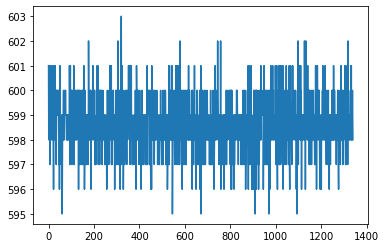

In [46]:
plt.plot(gogogo)

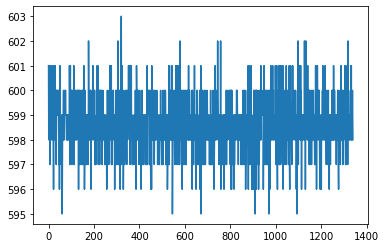

In [38]:
plt.plot(gogogo)

In [24]:
shutter_task.start()
dataset = experiment.Capture(10)
shutter_task.stop()

In [25]:
dataset.Frames

10

In [34]:
experiment.Preview()

In [35]:
experiment.Stop()

c:\users\raman\miniconda3\envs\control\lib\site-packages\nidaqmx\task.py:105: ResourceWarning: Task of name "_unnamedTask<1>" was not explicitly closed before it was destructed. Resources on the task device may still be reserved.
  'reserved.'.format(self.name), DaqResourceWarning)


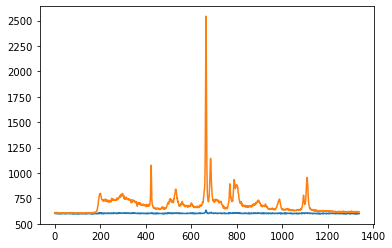

In [26]:
frame0 = dataset.GetFrame(0,0)
frame1 = dataset.GetFrame(0,1)
data0 = convert_buffer(frame0.GetData(), frame0.Format)
data1 = convert_buffer(frame1.GetData(), frame1.Format)
plt.plot(data0)
plt.plot(data1)

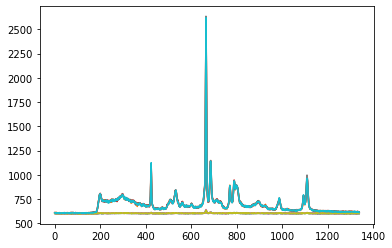

In [29]:
beepboop = []
for i in range(10):
    frame = dataset.GetFrame(0,i)
    data = convert_buffer(frame.GetData(), frame.Format)
    beepboop.append(data[664])
    plt.plot(data)

    

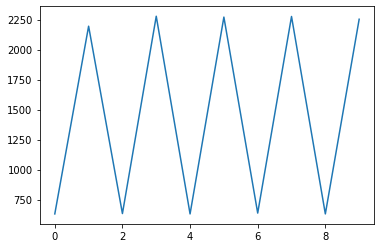

In [30]:
plt.plot(beepboop)

In [34]:
shutter_task.write(True)

DaqError: Attempted to write to an invalid combination of position and offset. The position and offset specified a sample prior to the first sample generated (sample 0).

Make sure any negative write offset specified will select a valid sample when combined with the write position.
Property: DAQmx_Write_RelativeTo
Requested Value: DAQmx_Val_CurrWritePos

Property: DAQmx_Write_Offset
Requested Value: 0

Task Name: _unnamedTask<2>

Status Code: -200287

In [38]:
shutter_task.close()

In [35]:
shutter_task.stop()

In [40]:
experiment.Preview()

In [41]:
experiment.Stop()

In [109]:
frame1 = dataset.GetFrame(1,0)
data1 = convert_buffer(frame1.GetData(), frame1.Format)
plt.plot(data1)

RemotingException: Failed to read from an IPC Port: The pipe has been ended.


Server stack trace: 
   at System.Runtime.Remoting.Channels.Ipc.IpcPort.Read(Byte[] data, Int32 offset, Int32 length)
   at System.Runtime.Remoting.Channels.SocketHandler.ReadFromSocket(Byte[] buffer, Int32 offset, Int32 count)
   at System.Runtime.Remoting.Channels.SocketHandler.Read(Byte[] buffer, Int32 offset, Int32 count)
   at System.Runtime.Remoting.Channels.SocketHandler.ReadAndMatchFourBytes(Byte[] buffer)
   at System.Runtime.Remoting.Channels.Tcp.TcpSocketHandler.ReadAndMatchPreamble()
   at System.Runtime.Remoting.Channels.Tcp.TcpSocketHandler.ReadVersionAndOperation(UInt16& operation)
   at System.Runtime.Remoting.Channels.Ipc.IpcClientHandler.ReadHeaders()
   at System.Runtime.Remoting.Channels.Ipc.IpcClientTransportSink.ProcessMessage(IMessage msg, ITransportHeaders requestHeaders, Stream requestStream, ITransportHeaders& responseHeaders, Stream& responseStream)
   at System.Runtime.Remoting.Channels.BinaryClientFormatterSink.SyncProcessMessage(IMessage msg)

Exception rethrown at [0]: 
   at System.Runtime.Remoting.Proxies.RealProxy.HandleReturnMessage(IMessage reqMsg, IMessage retMsg)
   at System.Runtime.Remoting.Proxies.RealProxy.PrivateInvoke(MessageData& msgData, Int32 type)
   at PrincetonInstruments.LightField.AddIns.Contracts.IImageDataSet.GetFrame(Int32 regionIndex, Int64 frameIndex)
   at PrincetonInstruments.LightField.AddIns.HostSideAdapters.IImageDataSetContractToViewHostAdapter.GetFrame(Int32 regionIndex, Int64 frameIndex)

In [110]:
auto.Dispose()

RemotingException: Failed to connect to an IPC Port: The system cannot find the file specified.
 

Server stack trace: 
   at System.Runtime.Remoting.Channels.Ipc.IpcPort.Connect(String portName, Boolean secure, TokenImpersonationLevel impersonationLevel, Int32 timeout)
   at System.Runtime.Remoting.Channels.Ipc.ConnectionCache.GetConnection(String portName, Boolean secure, TokenImpersonationLevel level, Int32 timeout)
   at System.Runtime.Remoting.Channels.Ipc.IpcClientTransportSink.ProcessMessage(IMessage msg, ITransportHeaders requestHeaders, Stream requestStream, ITransportHeaders& responseHeaders, Stream& responseStream)
   at System.Runtime.Remoting.Channels.BinaryClientFormatterSink.SyncProcessMessage(IMessage msg)

Exception rethrown at [0]: 
   at System.Runtime.Remoting.Proxies.RealProxy.HandleReturnMessage(IMessage reqMsg, IMessage retMsg)
   at System.Runtime.Remoting.Proxies.RealProxy.PrivateInvoke(MessageData& msgData, Int32 type)
   at PrincetonInstruments.LightField.AddIns.Contracts.ILightFieldAutomationContract.RemoveLightFieldClosedHandler(ILightFieldClosedEventArgsHandler handler)
   at PrincetonInstruments.LightField.AddIns.HostSideAdapters.ILightFieldAutomationContractToViewHostAdapter.remove_LightFieldClosed(EventHandler`1 value)
   at PrincetonInstruments.LightField.Automation.Automation.DisposeImpl(Boolean fromClosed)

In [42]:
auto.Dispose()